In [1]:
from ast import literal_eval

import numpy as np
import corner

import matplotlib.pyplot as plt
pltparams = {"axes.grid": False,
        "text.usetex" : True,
        "font.family" : "serif",
        "ytick.color" : "black",
        "xtick.color" : "black",
        "axes.labelcolor" : "black",
        "axes.edgecolor" : "black",
        "font.serif" : ["Computer Modern Serif"],
        "xtick.labelsize": 14,
        "ytick.labelsize": 14,
        "axes.labelsize": 14,
        "legend.fontsize": 16,
        "legend.title_fontsize": 16,
        "figure.titlesize": 16}

plt.rcParams.update(pltparams)

default_corner_kwargs = dict(bins=40, 
                        smooth=True, 
                        label_kwargs=dict(fontsize=16),
                        title_kwargs=dict(fontsize=16), 
                        quantiles=[],
                        levels=[0.68, 0.95],
                        plot_density=False, 
                        plot_datapoints=False, 
                        fill_contours=False,
                        max_n_ticks=4, 
                        min_n_ticks=3,
                        save=False,
                        truth_color="darkorange")


import pandas as pd

from fiesta.plot import latex_labels

from fiesta.plot import LightcurvePlotter



## Posteriors

Load the data

In [4]:
posterior_afgpy_reduced = pd.DataFrame(dict(np.load("./afgpy/posterior.npz")))
posterior_afgpy = pd.DataFrame(dict(np.load("../AT2017gfo+GRB170817/afgpy/posterior.npz")))

Make corner plot

In [5]:
var_names = ["inclination_EM", "log10_E0", "thetaCore", "log10_mej_dyn", "v_ej_dyn", "Ye_dyn", "log10_mej_wind", "v_ej_wind", "Ye_wind"]
labels = [latex_labels.get(p, p) for p in var_names]

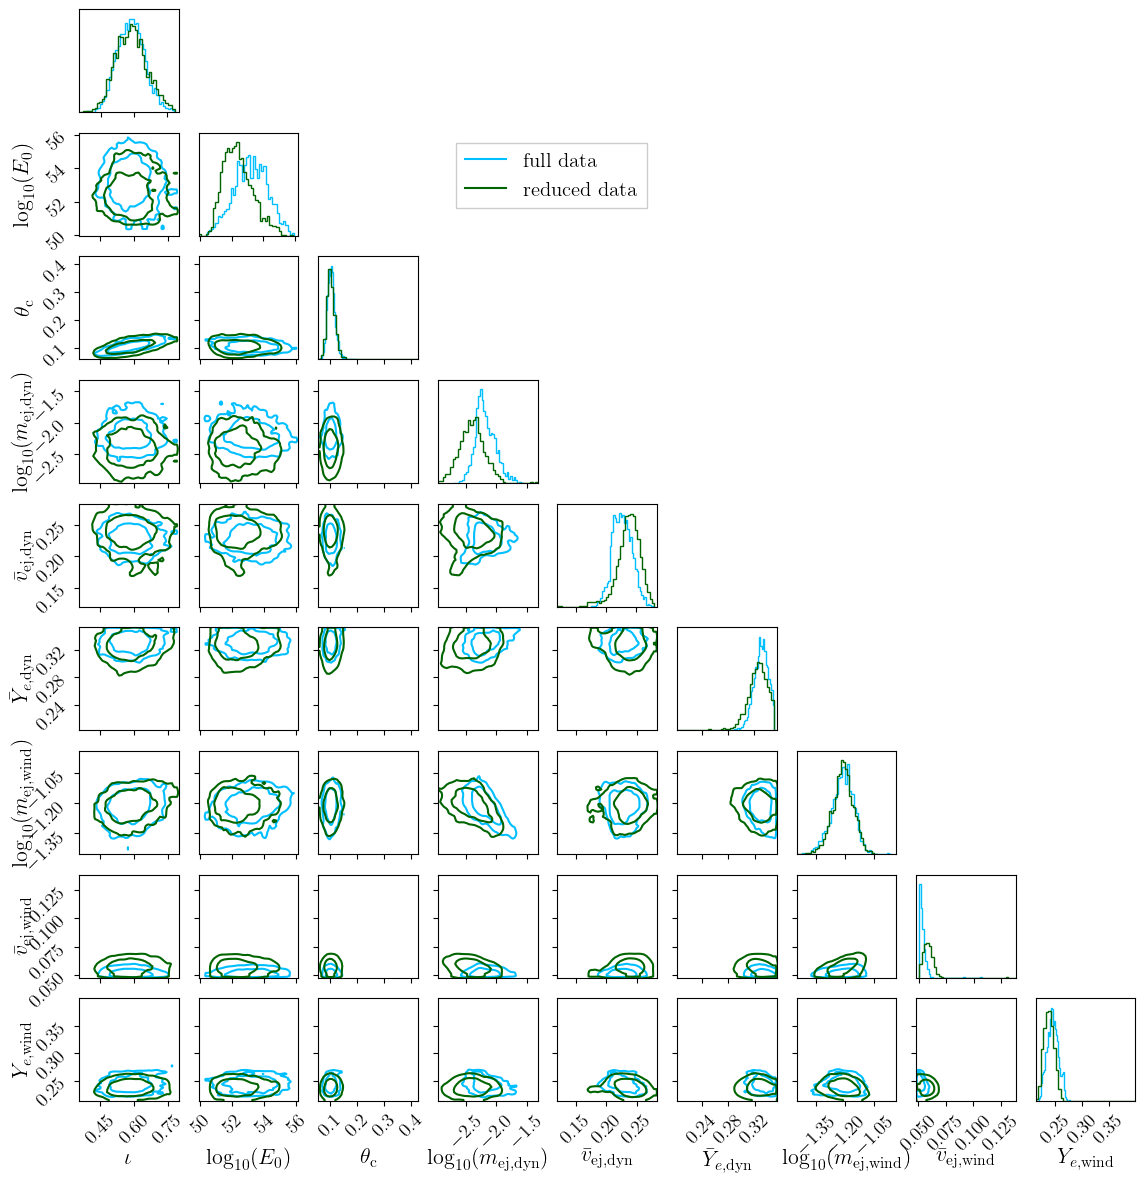

In [ ]:
fig, ax = plt.subplots(len(var_names), len(var_names), figsize = (12, 12))

corner.corner(posterior_afgpy[var_names], 
              fig=fig,
              color = "deepskyblue",
             labelpad = 0.15,
              labels=labels,
              **default_corner_kwargs,
              hist_kwargs=dict(density=True))

corner.corner(posterior_afgpy_reduced[var_names],
              fig=fig,
              color="darkgreen",
              labelpad = 0.15,
              labels=labels,
              **default_corner_kwargs,
              hist_kwargs=dict(density=True))

handles = []
for c in ["deepskyblue", "darkgreen"]:
    handle = plt.plot([],[], color=c)[0]
    handles.append(handle)

ax[1, 4].legend(handles=handles, labels=["full data", "reduced data"], fontsize=15, fancybox=False, framealpha=1)
fig.subplots_adjust(left=0.08, bottom=0.08, right=0.96, top=0.99, hspace=0.2, wspace=0.2)


## Lightcurves

full data:

In [2]:
from fiesta.inference.lightcurve_model import AfterglowFlux, BullaFlux, CombinedSurrogate
from fiesta.utils import load_event_data
from fiesta.inference.likelihood import EMLikelihood

data = load_event_data("../../data/AT2017gfo+GRB170817A.dat")
#data_reduced = load_event_data("../../data/AT2017gfo+GRB170817A_reduced.dat")
trigger_time = 57982.52851852

model1 = AfterglowFlux(name="afgpy_gaussian_CVAE",
                      filters = data.keys())

model2 = BullaFlux(name="Bu2025_MLP",
                   filters = data.keys())

model = CombinedSurrogate(models=[model1, model2],
                          sample_times=np.geomspace(0.3, 1000, 200))

likelihood = EMLikelihood(model,
                          data,
                          data.keys(),
                          trigger_time=trigger_time,
                          tmin=0.3,
                          tmax=1000.,
                          fixed_params={"luminosity_distance": 43.583656, "redshift":0.009727})

lc_plotter = LightcurvePlotter(posterior_afgpy,
                               likelihood)


likelihood_reduced = EMLikelihood(model,
                          data_reduced,
                          data_reduced.keys(),
                          trigger_time=trigger_time,
                          tmin=0.3,
                          tmax=1000.,
                          fixed_params={"luminosity_distance": 43.583656, "redshift":0.009727})

lc_plotter_reduced = LightcurvePlotter(posterior_afgpy_reduced,
                                       likelihood_reduced)

09:57 fiesta INFO    : Loading surrogate afgpy_gaussian_CVAE. This surrogate should only be used in the following parameter ranges:
09:57 fiesta INFO    : 	 inclination_EM: (0, 1.5707963267948966)
09:57 fiesta INFO    : 	 log10_E0: (47, 57)
09:57 fiesta INFO    : 	 thetaCore: (0.01, 0.6283185307179586)
09:57 fiesta INFO    : 	 alphaWing: (0.2, 3.5)
09:57 fiesta INFO    : 	 log10_n0: (-6, 2)
09:57 fiesta INFO    : 	 p: (2.01, 3)
09:57 fiesta INFO    : 	 log10_epsilon_e: (-4, 0)
09:57 fiesta INFO    : 	 log10_epsilon_B: (-8, 0)


09:57 fiesta INFO    : Surrogate afgpy_gaussian_CVAE is loading with the following filters: ['2massh', '2massj', '2massks', 'X-ray-1keV', 'bessellv', 'ps1::g', 'ps1::i', 'ps1::r', 'ps1::y', 'ps1::z', 'radio-3GHz', 'radio-6GHz', 'sdssu'].
09:57 fiesta INFO    : Loaded for surrogate afgpy_gaussian_CVAE from /nfs/aya/work/hkoehn/fiesta/fiesta/src/fiesta/surrogates/GRB/afgpy_gaussian_CVAE/model.
09:57 fiesta INFO    : Loading surrogate Bu2025_MLP. This surrogate should only be used in the following parameter ranges:
09:57 fiesta INFO    : 	 log10_mej_dyn: (-3.0, -1.3010299956639813)
09:57 fiesta INFO    : 	 v_ej_dyn: (0.12, 0.28)
09:57 fiesta INFO    : 	 Ye_dyn: (0.15, 0.35)
09:57 fiesta INFO    : 	 log10_mej_wind: (-2.0, -0.8860566476931633)
09:57 fiesta INFO    : 	 v_ej_wind: (0.05, 0.15)
09:57 fiesta INFO    : 	 Ye_wind: (0.2, 0.4)
09:57 fiesta INFO    : 	 inclination_EM: (0.0, 1.5707963267948966)
09:57 fiesta INFO    : Surrogate Bu2025_MLP is loading with the following filters: ['2mass

NameError: name 'posterior_afgpy' is not defined

19:50 fiesta WARNING : Filters {'radio-3GHz', 'radio-6GHz', 'X-ray-1keV', 'bessellv'} in systematics file are not part of the lightcurve data. Removing them from the sys. error group GRB.
19:50 fiesta WARNING : Filters {'radio-3GHz', 'radio-6GHz', 'X-ray-1keV', 'bessellv'} in systematics file are not part of the lightcurve data. Removing them from the sys. error group GRB.
19:50 fiesta WARNING : Filters {'radio-3GHz', 'radio-6GHz', 'X-ray-1keV', 'bessellv'} in systematics file are not part of the lightcurve data. Removing them from the sys. error group GRB.
19:51 fiesta WARNING : Filters {'radio-3GHz', 'radio-6GHz', 'X-ray-1keV', 'bessellv'} in systematics file are not part of the lightcurve data. Removing them from the sys. error group GRB.
19:51 fiesta WARNING : Filters {'radio-3GHz', 'radio-6GHz', 'X-ray-1keV', 'bessellv'} in systematics file are not part of the lightcurve data. Removing them from the sys. error group GRB.
19:51 fiesta WARNING : Filters {'radio-3GHz', 'radio-6GHz', 

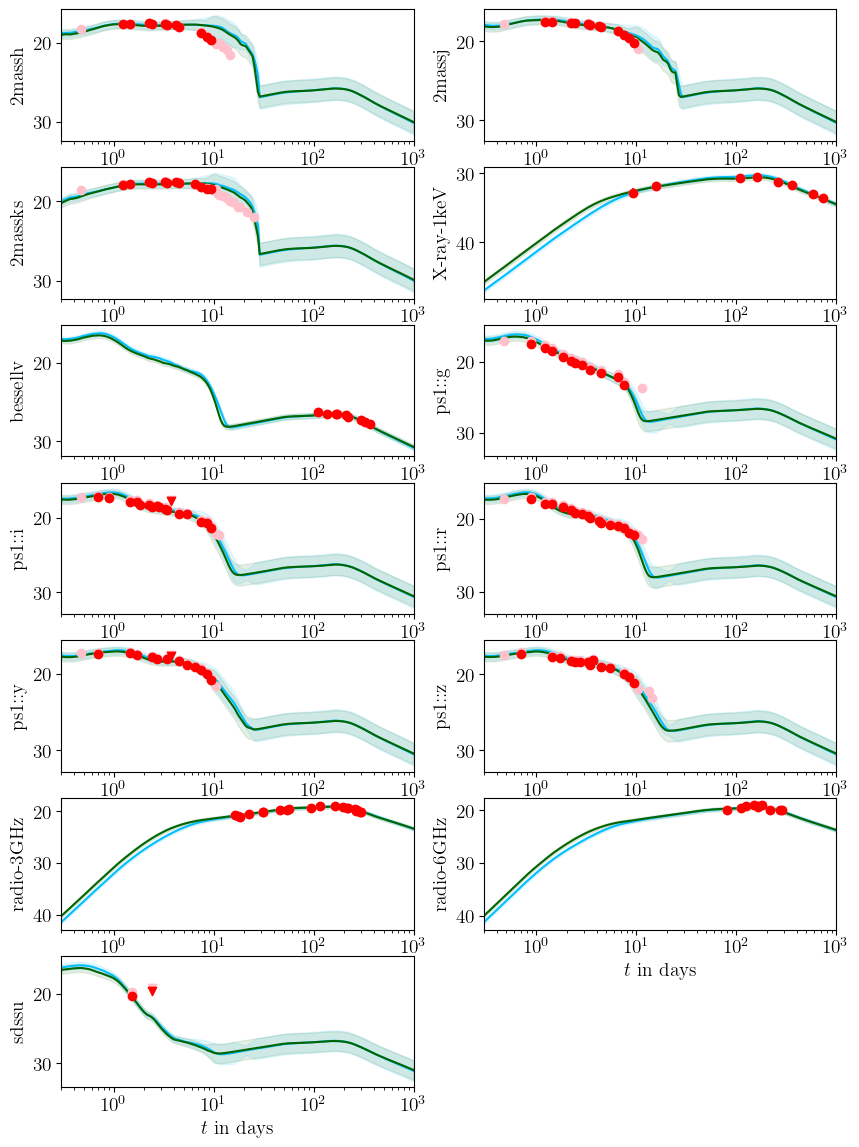

In [23]:
fig, ax = plt.subplots(7, 2, figsize=(10, 14))

for cax, filt in zip(ax.flatten(), data.keys()):
    lc_plotter.plot_data(cax, filt, color="pink")
    lc_plotter_reduced.plot_data(cax, filt, color="red")

    lc_plotter.plot_best_fit_lc(cax, filt, color="deepskyblue")
    lc_plotter_reduced.plot_best_fit_lc(cax, filt, color="darkgreen")

    lc_plotter.plot_sys_uncertainty_band(cax, filt, systematics_file="../AT2017gfo+GRB170817/systematics_file.yaml", zorder=0, color="deepskyblue")
    lc_plotter_reduced.plot_sys_uncertainty_band(cax, filt, systematics_file="./systematics_file.yaml", zorder=0, color="darkgreen")

    cax.invert_yaxis()
    cax.set_xscale("log")
    cax.set_xlabel("$t$ in days")
    cax.set_xlim((0.3, 1000))
    cax.set_ylabel(filt)

ax[-1, -1].set_axis_off()
fig.savefig("lightcurve_comparison.pdf",dpi=250)